[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BPCOG.PA']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CMNEB.PA']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed
[********************

Empty DataFrame
Columns: [HSBA.L Open, HSBA.L High, HSBA.L Low, HSBA.L Close, HSBA.L Adj Close, HSBA.L Volume, BNP.PA Open, BNP.PA High, BNP.PA Low, BNP.PA Close, BNP.PA Adj Close, BNP.PA Volume, ACA.PA Open, ACA.PA High, ACA.PA Low, ACA.PA Close, ACA.PA Adj Close, ACA.PA Volume, SAN.MC Open, SAN.MC High, SAN.MC Low, SAN.MC Close, SAN.MC Adj Close, SAN.MC Volume, BARC.L Open, BARC.L High, BARC.L Low, BARC.L Close, BARC.L Adj Close, BARC.L Volume, UBSG.SW Open, UBSG.SW High, UBSG.SW Low, UBSG.SW Close, UBSG.SW Adj Close, UBSG.SW Volume, BPCOG.PA Open, BPCOG.PA High, BPCOG.PA Low, BPCOG.PA Close, BPCOG.PA Adj Close, BPCOG.PA Volume, GLE.PA Open, GLE.PA High, GLE.PA Low, GLE.PA Close, GLE.PA Adj Close, GLE.PA Volume, DBK.DE Open, DBK.DE High, DBK.DE Low, DBK.DE Close, DBK.DE Adj Close, DBK.DE Volume, CMNEB.PA Open, CMNEB.PA High, CMNEB.PA Low, CMNEB.PA Close, CMNEB.PA Adj Close, CMNEB.PA Volume, LLOY.L Open, LLOY.L High, LLOY.L Low, LLOY.L Close, LLOY.L Adj Close, LLOY.L Volume, ISP.MI Op

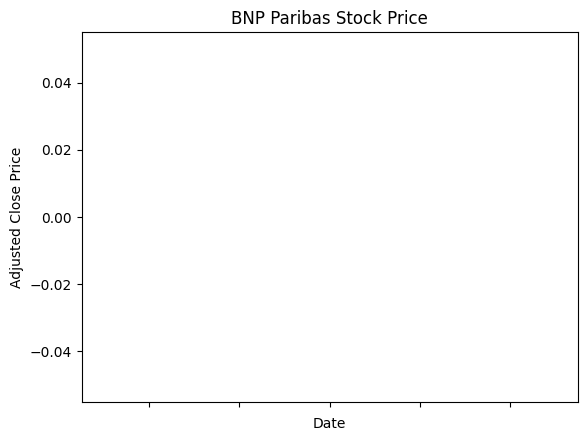

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des symboles des principales banques européennes
# Ajoutez ou remplacez par d'autres symboles de banques européennes si nécessaire
european_banks = [
    'HSBA.L',   # HSBC (UK)
    'BNP.PA',   # BNP Paribas
    'ACA.PA',   # Crédit Agricole 
    'SAN.MC',   # Banco Santander (Spain)
    'BARC.L',   # Barclays (UK)
    'UBSG.SW',  # UBS Group (Switzerland)
    'BPCOG.PA', # BPCE (France) 
    'GLE.PA',   # Société Générale 
    'DBK.DE',   # Deutsche Bank (Germany)
    'CMNEB.PA', # Crédit Mutuel 
    'LLOY.L',   # Lloyds Banking 
    'ISP.MI',   # Intesa San Paolo
    'INGA.AS',  # ING Group 
    'UCG.MI',   # UniCredit SPA 
    'NWG.L',    # Natwest Group
]

# Définir la période d'historique pour avoir un nombre suffisant d'instances
start_date = '2018-01-01'
end_date = '2023-01-01'

# Télécharger les données pour chaque action
data = {}
for ticker in european_banks:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Combiner les données de toutes les actions en un seul DataFrame
combined_data = pd.concat(data, axis=1)

# Remplir les valeurs manquantes
combined_data = combined_data.fillna(method="ffill").fillna(method="bfill")

# Créer des variables supplémentaires pour chaque action
for ticker in european_banks:
    combined_data[(ticker, 'Daily Return')] = combined_data[(ticker, 'Adj Close')].pct_change()
    combined_data[(ticker, '50 MA')] = combined_data[(ticker, 'Adj Close')].rolling(window=50).mean()
    combined_data[(ticker, '200 MA')] = combined_data[(ticker, 'Adj Close')].rolling(window=200).mean()
    combined_data[(ticker, 'Volatility')] = combined_data[(ticker, 'Adj Close')].rolling(window=20).std()
    combined_data[(ticker, 'Volume MA')] = combined_data[(ticker, 'Volume')].rolling(window=20).mean()

# Supprimer les premières lignes avec des valeurs NaN dues aux moyennes mobiles
combined_data = combined_data.dropna()

# Convertir le DataFrame en un format plat (optionnel pour faciliter l'utilisation avec des modèles)
combined_data.columns = [' '.join(col).strip() for col in combined_data.columns.values]

# Affichage de quelques lignes du DataFrame pour vérifier les données
print(combined_data.head())
print("Shape of the data:", combined_data.shape)

# Tracer les données de l'une des banques pour visualisation (par exemple, BNP Paribas)
combined_data['BNP.PA Adj Close'].plot(title="BNP Paribas Stock Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


            BNP.PA Open  BNP.PA High  BNP.PA Low  BNP.PA Close  \
Date                                                             
2018-01-02    62.680000    62.700001   61.660000     62.090000   
2018-01-03    62.320000    63.270000   61.980000     62.639999   
2018-01-04    62.709999    64.290001   62.709999     63.770000   
2018-01-05    64.139999    64.589996   63.669998     63.889999   
2018-01-08    64.290001    64.839996   64.010002     64.500000   

            BNP.PA Adj Close  BNP.PA Volume  HSBA.L Open  HSBA.L High  \
Date                                                                    
2018-01-02         37.975788      2785984.0   766.200012   774.900024   
2018-01-03         38.312183      3766640.0   763.599976   766.200012   
2018-01-04         39.003319      4272372.0   750.299988   767.299988   
2018-01-05         39.076714      3125691.0   763.900024   767.299988   
2018-01-08         39.449802      3030090.0   759.799988   762.799988   

            HSBA.L Low  H

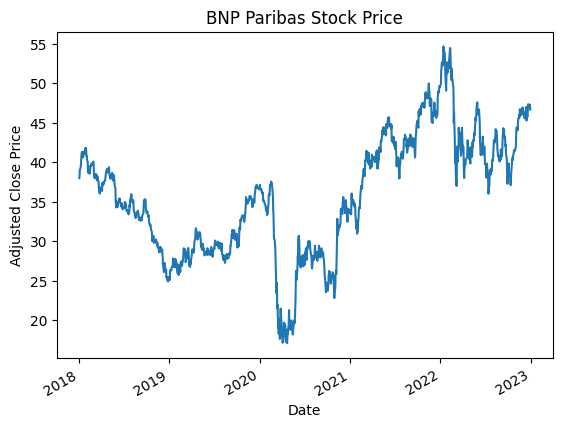

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des symboles des principales banques européennes, sans BPCOG.PA et CMNEB.PA
european_banks = [
    'BNP.PA',   # BNP Paribas
    'HSBA.L',   # HSBC (UK)
    'BARC.L',   # Barclays (UK)
    'DBK.DE',   # Deutsche Bank (Germany)
    'UBSG.SW',  # UBS Group (Switzerland)
    'INGA.AS',  # ING Group (Netherlands)
    'ISP.MI',   # Intesa Sanpaolo (Italy)
    'SAN.MC',   # Banco Santander (Spain)
    'BBVA.MC'   # BBVA (Spain)
]

# Définir la période d'historique
start_date = '2018-01-01'
end_date = '2023-01-01'

# Télécharger les données pour chaque action
data = {}
for ticker in european_banks:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Combiner les données de toutes les actions en un seul DataFrame
combined_data = pd.concat(data, axis=1)

# Remplir les valeurs manquantes
combined_data = combined_data.ffill().bfill()

# Préparation d'un DataFrame pour les caractéristiques supplémentaires
additional_features = pd.DataFrame(index=combined_data.index)

# Créer des variables supplémentaires pour chaque action
for ticker in european_banks:
    additional_features[(ticker, 'Daily Return')] = combined_data[(ticker, 'Adj Close')].pct_change(fill_method=None)
    additional_features[(ticker, '50 MA')] = combined_data[(ticker, 'Adj Close')].rolling(window=50).mean()
    additional_features[(ticker, '200 MA')] = combined_data[(ticker, 'Adj Close')].rolling(window=200).mean()
    additional_features[(ticker, 'Volatility')] = combined_data[(ticker, 'Adj Close')].rolling(window=20).std()
    additional_features[(ticker, 'Volume MA')] = combined_data[(ticker, 'Volume')].rolling(window=20).mean()

# Supprimer les premières lignes avec des valeurs NaN dues aux moyennes mobiles
additional_features = additional_features.dropna()

# Concaténer les données originales et les caractéristiques supplémentaires
final_data = pd.concat([combined_data, additional_features], axis=1)

# Convertir le DataFrame en un format plat
final_data.columns = [' '.join(col).strip() for col in final_data.columns.values]

# Afficher les premières lignes du DataFrame final
print(final_data.head())
print("Shape of the data:", final_data.shape)

# Tracer les données de l'une des banques pour visualisation (par exemple, BNP Paribas)
final_data['BNP.PA Adj Close'].plot(title="BNP Paribas Stock Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()
